In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [2]:
drug = pd.read_csv('./drug-use-by-age.csv')
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [3]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [4]:
# some of the frequency columns are shown as object dtype. 
# to inspect

missing_value_cols = []
for col in drug.columns:
    if drug[col].dtypes == 'object':
        print(f'"{col}" column datatype is {drug[col].dtypes}')
        print(f'{drug[col].unique()}\n')
        missing_value_cols.append(col)

"age" column datatype is object
['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22-23' '24-25' '26-29'
 '30-34' '35-49' '50-64' '65+']

"cocaine-frequency" column datatype is object
['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0' '-']

"crack-frequency" column datatype is object
['-' '3.0' '9.5' '1.0' '21.0' '10.0' '2.0' '5.0' '17.0' '6.0' '15.0'
 '48.0' '62.0']

"heroin-frequency" column datatype is object
['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '45.0' '30.0' '57.5'
 '88.0' '50.0' '66.0' '280.0' '41.0' '120.0']

"inhalant-frequency" column datatype is object
['19.0' '12.0' '5.0' '5.5' '3.0' '4.0' '2.0' '3.5' '10.0' '13.5' '-']

"oxycontin-frequency" column datatype is object
['24.5' '41.0' '4.5' '3.0' '4.0' '6.0' '7.0' '7.5' '12.0' '13.5' '17.5'
 '20.0' '46.0' '5.0' '-']

"meth-frequency" column datatype is object
['-' '5.0' '24.0' '10.5' '36.0' '48.0' '12.0' '105.0' '2.0' '46.0' '21.0'
 '30.0' '54.0' '104.0']



In [5]:
# some values are '-' and the other values in the same columns are convert to string-like dtype.
missing_value_cols

['age',
 'cocaine-frequency',
 'crack-frequency',
 'heroin-frequency',
 'inhalant-frequency',
 'oxycontin-frequency',
 'meth-frequency']

In [6]:
# take a closer look in each column
drug[drug['cocaine-frequency'] == '-']

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [7]:
drug[drug['crack-frequency'] == '-']

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [8]:
drug[drug['heroin-frequency'] == '-'][['heroin-use','heroin-frequency']]

,heroin-use,heroin-frequency
1,0.0,-


In [9]:
drug[drug['inhalant-frequency'] == '-'][['inhalant-use','inhalant-frequency']]

,inhalant-use,inhalant-frequency
16,0.0,-


In [10]:
drug[drug['oxycontin-frequency'] == '-'][['oxycontin-use','oxycontin-frequency']]

,oxycontin-use,oxycontin-frequency
16,0.0,-


In [11]:
drug[drug['meth-frequency'] == '-'][['meth-use','meth-frequency']]

,meth-use,meth-frequency
0,0.0,-
16,0.0,-


In [12]:
# the '-' reflects the use of those particular drug use percentage is 0. Therefore, '-' should be replaced with 0.
# age column does not require convert for now

for c in missing_value_cols[1:]:
    drug [c] = drug[c].map(lambda x: 0.0 if x == '-' else float(x))

In [13]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     float64
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     float64
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     float64
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [14]:
# convert age to float dtype using average age on each row. 

age_ave = [12,13,14,15,16,17,18,19,20,21,22.5,24.5,27.5,32,42,57,65]
drug.insert(loc = 1, column = 'age_ave', value = age_ave)
drug.head()

,age,age_ave,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,12.0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,13.0,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,14.0,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,15.0,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,16.0,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [15]:
# make subset of drug use
use_by_age = drug[['age','age_ave','n','alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use','pain-releiver-use','oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']]

# make subset of use frequency
frequency_by_age = drug[['age','age_ave','n','alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency']]

In [16]:
# tried pairplot on both subsets
# both were too large to inspect

# sns.pairplot(use_age)
# sns.pairplot(frequency_by_age)

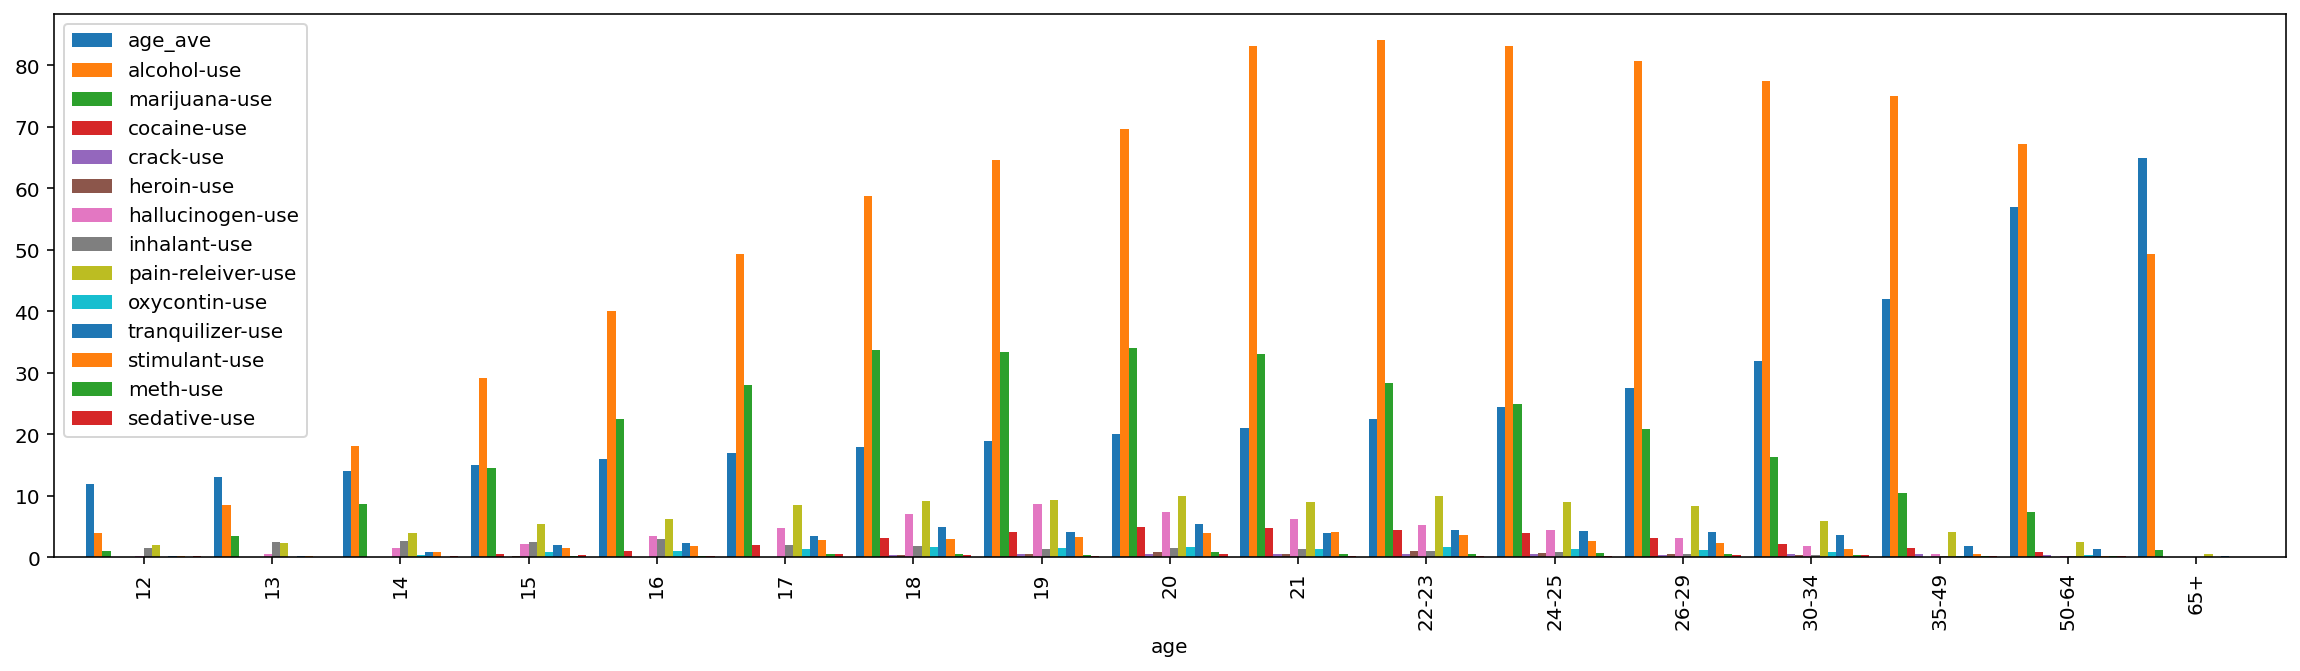

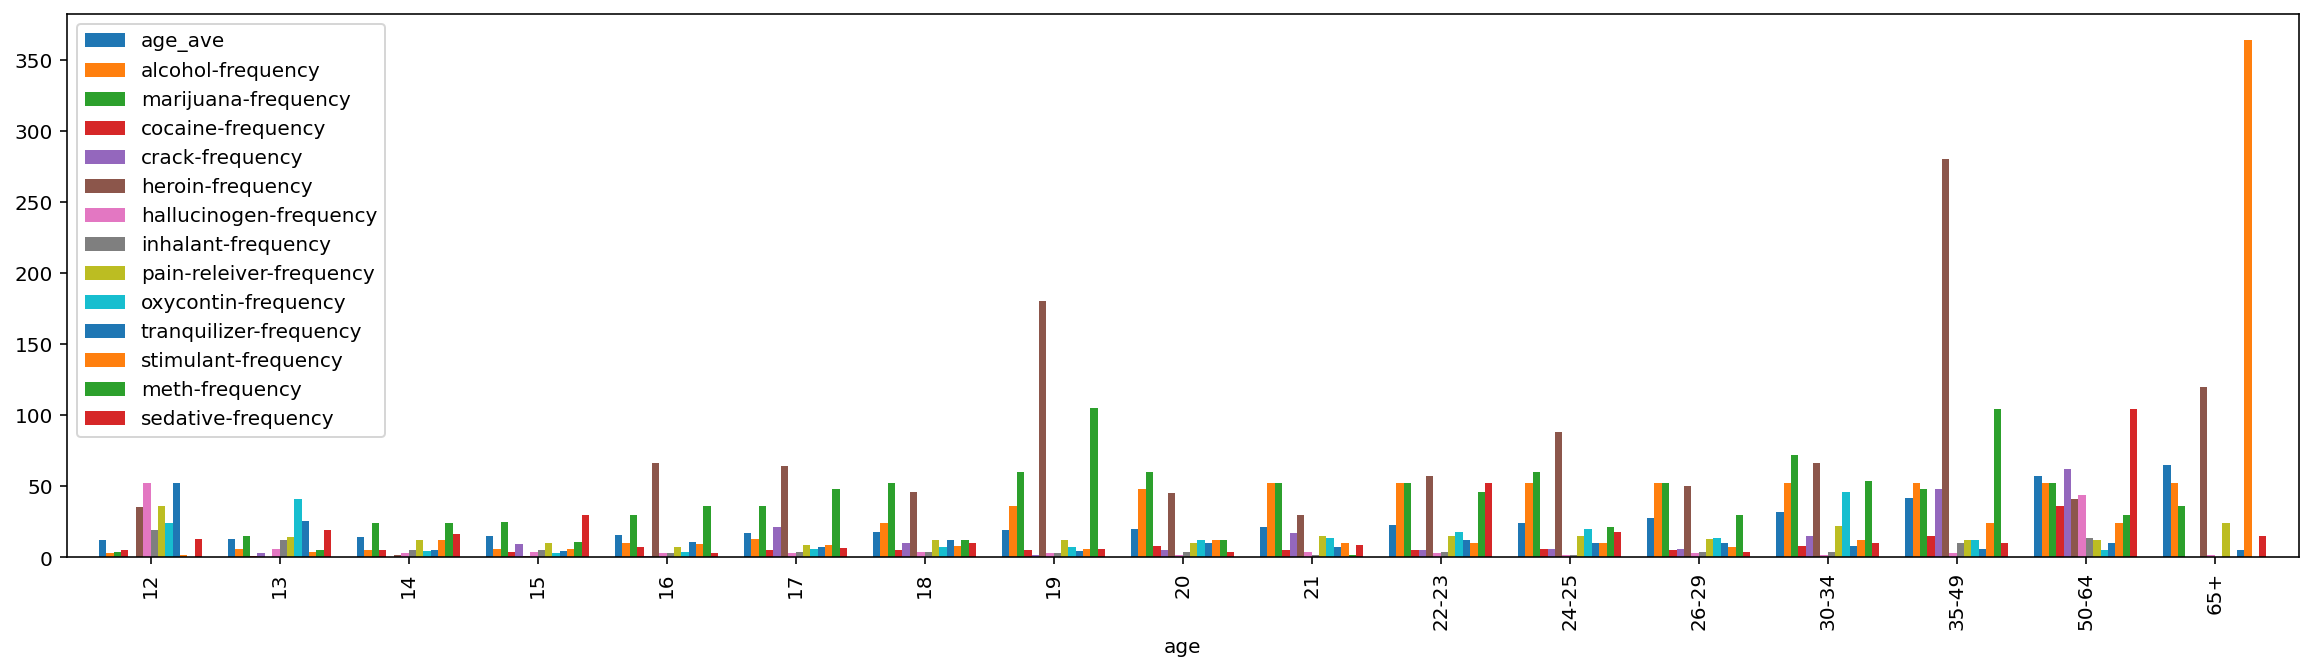

In [17]:
# overview by age
use_by_age.drop(columns = 'n').plot(kind = 'bar', x ='age', figsize = (20,5), width = .9)
frequency_by_age.drop(columns = 'n').plot(kind = 'bar', x ='age', figsize = (20,5), width = .8);

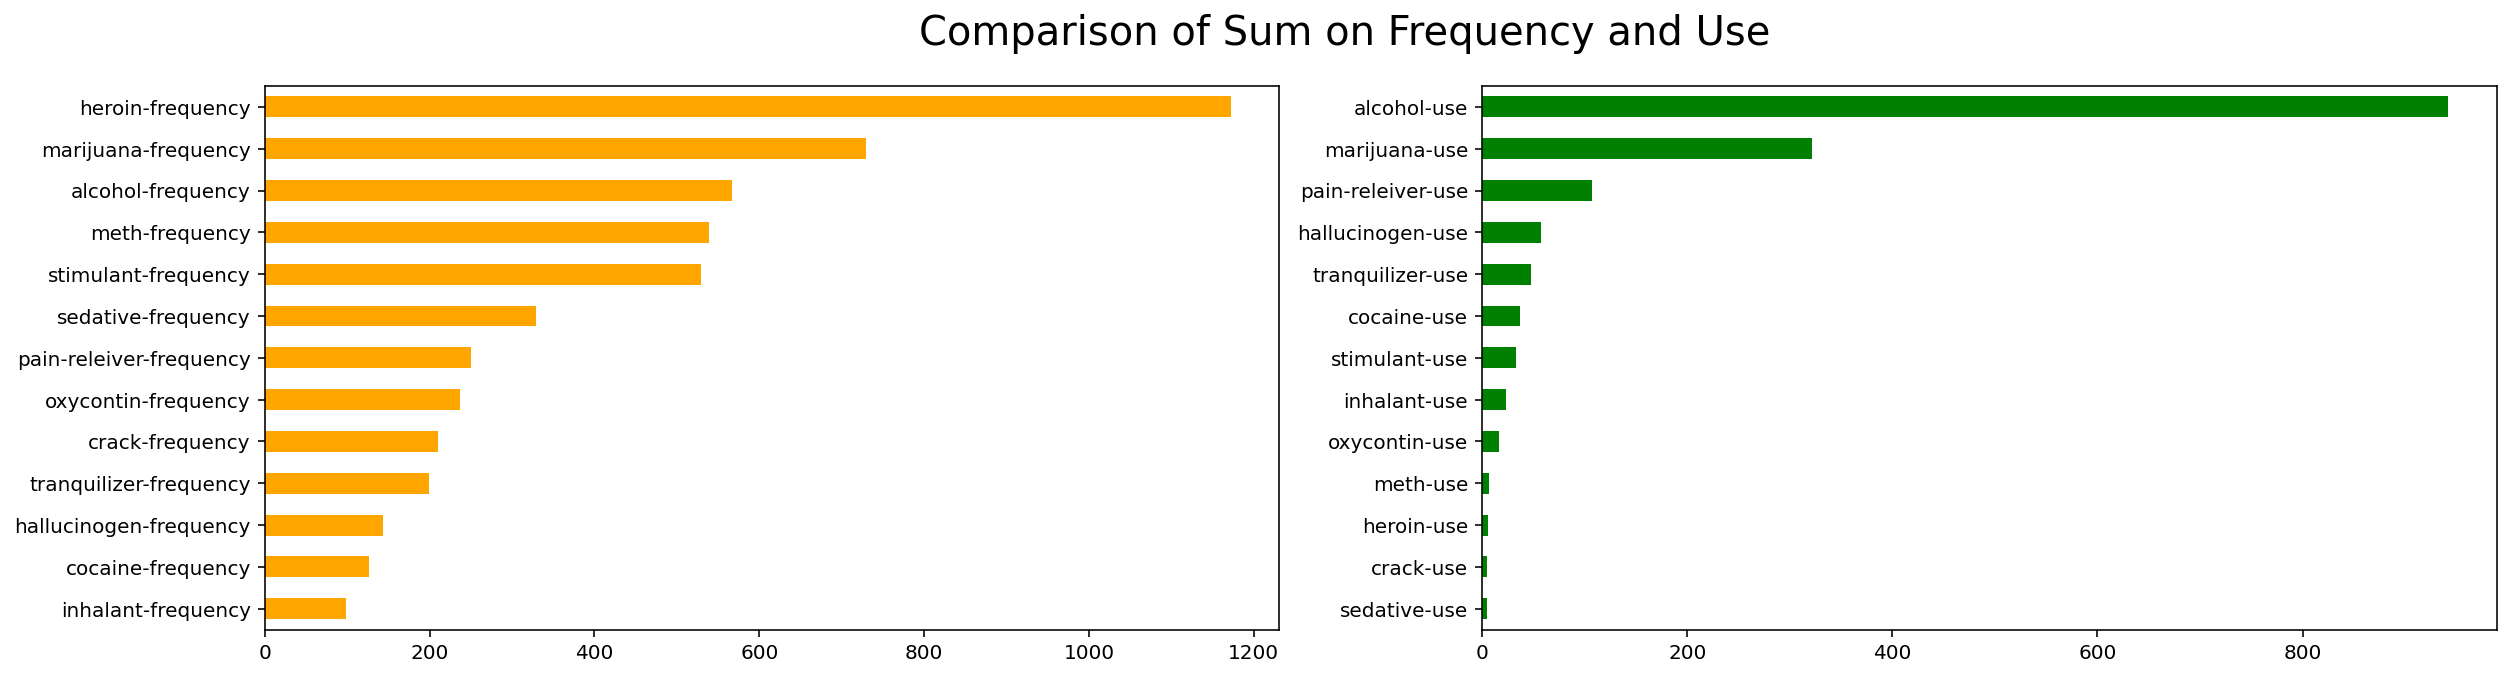

In [18]:
fig, axes = plt.subplots(1,2, figsize=(20,5));
fig.suptitle('Comparison of Sum on Frequency and Use',fontsize = 20)

frequency_by_age.drop(columns = ['age','age_ave','n']).sum().sort_values().plot(kind = 'barh', ax = axes[0], color = 'orange')
use_by_age.drop(columns = ['age','age_ave','n']).sum().sort_values().plot(kind = 'barh', ax = axes[1], color = 'green');

In [72]:
# findings:
# 1. alcohol and marijuana were obviously the most popular in all age groups. 
# 2. With less people using, Herion and meth stood out in the use frequency, which reflected the high addictiveness. 

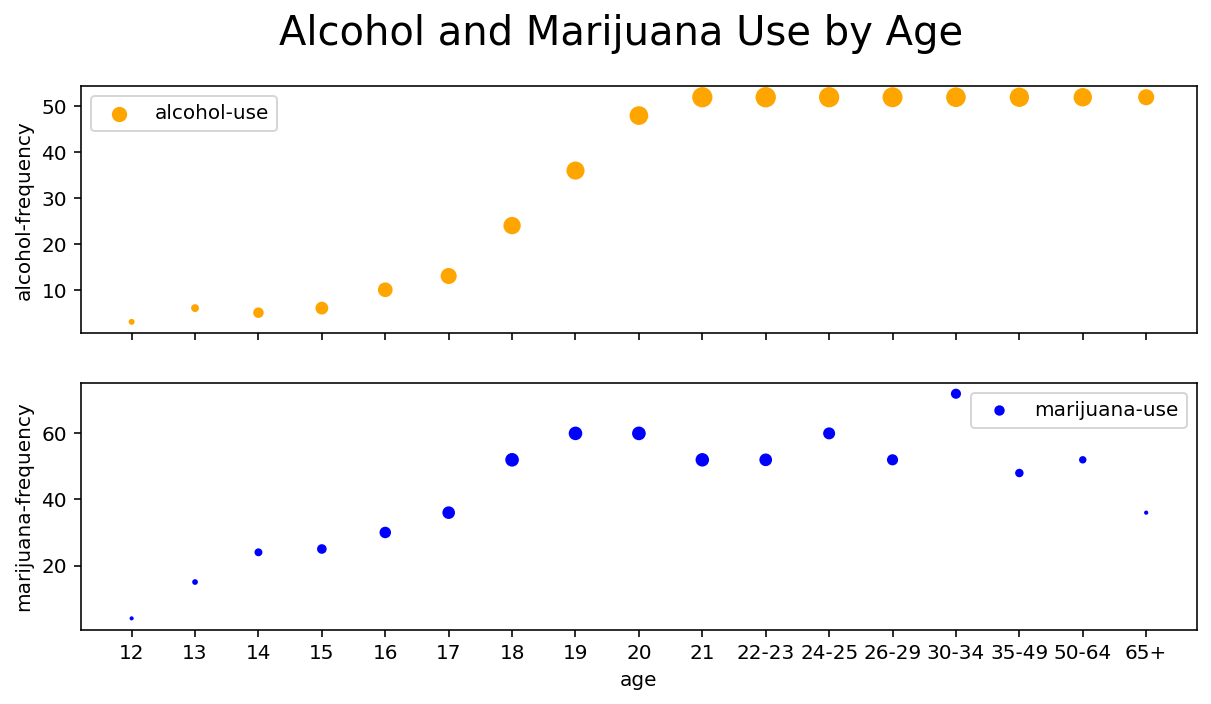

In [19]:
# inspect alcohol and marijuana

alcohol = drug[['age','age_ave','alcohol-use','alcohol-frequency']]
marijuana = drug[['age','age_ave','marijuana-use','marijuana-frequency']]

fig, axes = plt.subplots(2, sharex = True, figsize=(10,5));
fig.suptitle('Alcohol and Marijuana Use by Age',fontsize = 20)

alcohol.plot(kind = 'scatter', x = 'age',y = 'alcohol-frequency', s = [use for use in alcohol['alcohol-use']], c='orange', label = 'alcohol-use',ax = axes[0])
marijuana.plot(kind = 'scatter', x = 'age',y = 'marijuana-frequency', s = [use for use in marijuana['marijuana-use']], c='blue',label = 'marijuana-use', ax = axes[1]);

# findings:
# 1. Alcohol use and frequency grew by age and stablised after 21.
# 2. Marijuana use and frequency raised since 18 and in high use through out mid age, starting to fall after 34.

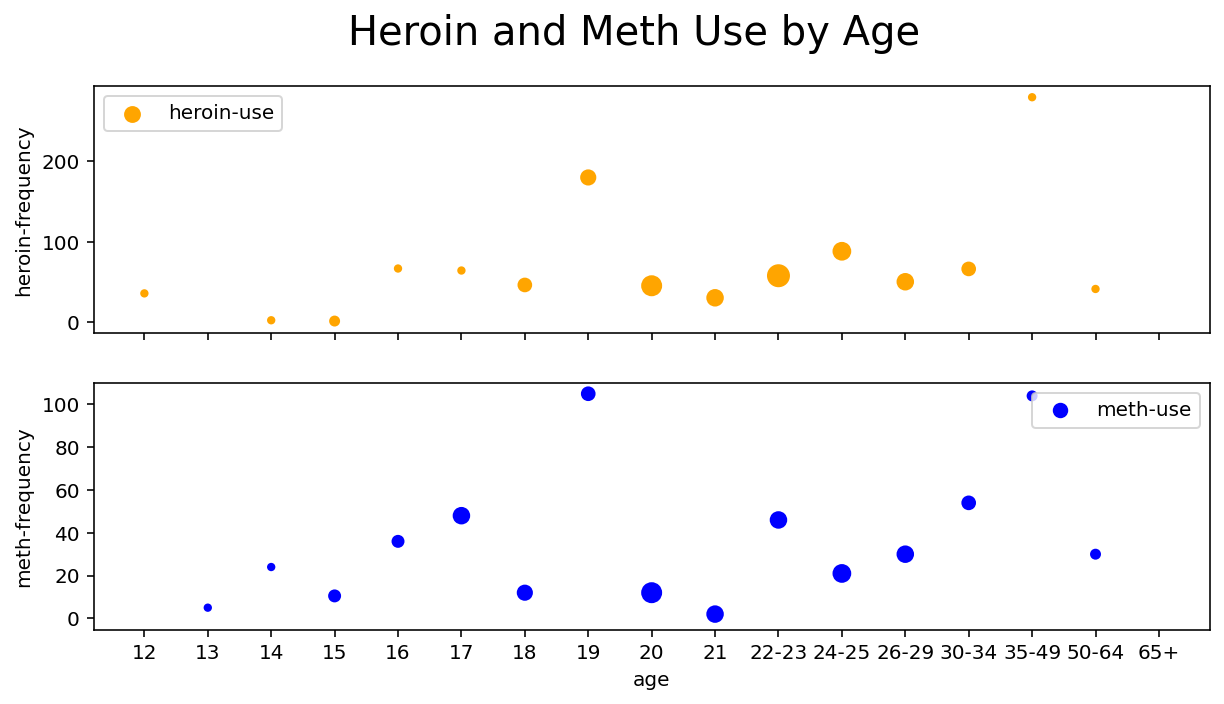

In [20]:
# inspect herion and meth

heroin = drug[['age','age_ave','heroin-use','heroin-frequency']]
meth = drug[['age','age_ave','meth-use','meth-frequency']]

fig, axes = plt.subplots(2, sharex = True, figsize=(10,5));
fig.suptitle('Heroin and Meth Use by Age',fontsize = 20)

heroin.plot(kind = 'scatter', x = 'age',y = 'heroin-frequency', s = [use*100 for use in heroin['heroin-use']], c='orange', label = 'heroin-use',ax = axes[0])
meth.plot(kind = 'scatter', x = 'age',y = 'meth-frequency', s = [use*100 for use in meth['meth-use']], c='blue',label = 'meth-use', ax = axes[1]);

# findings:
#  Both heroin and meth peak up at the age of 19 and through 35 to 49.
#  Would suggest to look into these age groups.

In [21]:
# the dataset is not groupped by age evenly. 
# I tried to slice the data by approximately 15-year age difference and under age.

# under age, from age 12 to 20
under_age = drug.drop(columns = 'age_ave').iloc[:9,:]

# mid range
# from age 21 to 34
mid_age = drug.drop(columns = 'age_ave').iloc[9:14,:]

# older range 35+
above_age = drug.drop(columns = 'age_ave').iloc[14:,:]

# below merging sacrifices data accuracy but will be efficient for visualization 

merged_under_age = pd.DataFrame(under_age.drop(columns = ['age','n']).mean()).T
merged_under_age.insert(loc = 0, column = 'n', value = under_age['n'].sum())
merged_under_age.insert(loc = 0, column = 'age', value = '12-20')

merged_mid_age = pd.DataFrame(mid_age.drop(columns = ['age','n']).mean()).T
merged_mid_age .insert(loc = 0, column = 'n', value = mid_age['n'].sum())
merged_mid_age .insert(loc = 0, column = 'age', value = '21-34')

# concat all three ranges together
drug_by_age_group = pd.concat([merged_under_age, merged_mid_age, above_age])
drug_by_age_group.reset_index(drop = True, inplace = True)
drug_by_age_group[['age','n']]

,age,n
0,12-20,24362
1,21-34,17144
2,35-49,7391
3,50-64,3923
4,65+,2448


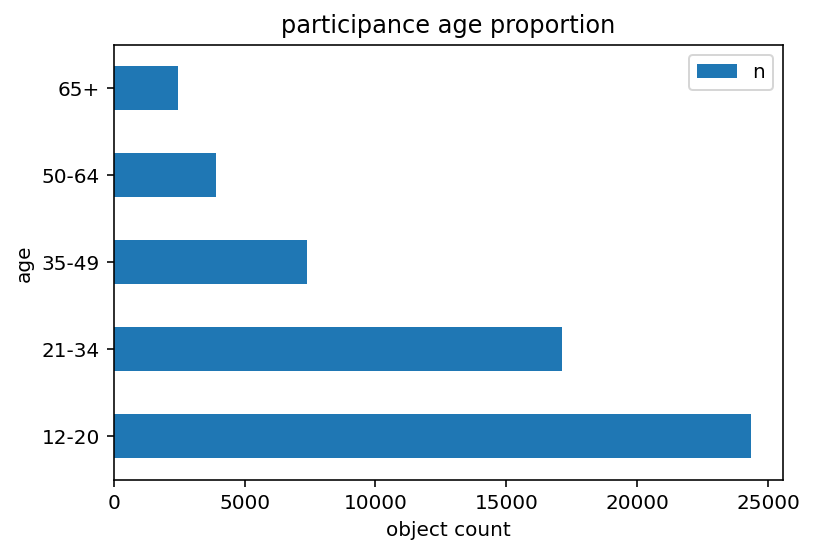

In [22]:
# plot the participance age proportion in the dataset

drug_by_age_group[['age','n']].plot(kind = 'barh', x = 'age')
plt.title('participance age proportion')
plt.xlabel('object count');

# Underage group weights the largest in the dataset.
# And it has the data break down for each age, which could be look into later on. 

In [23]:
drug_by_age_group

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12-20,24362,38.011111,16.777778,19.922222,34.0,1.777778,5.111111,0.188889,5.722222,...,0.977778,12.166667,2.644444,14.611111,1.966667,7.611111,0.355556,28.055556,0.311111,12.0
1,21-34,17144,81.740000,52.000000,24.700000,57.6,3.720000,5.800000,0.480000,9.800000,...,1.280000,22.100000,4.080000,9.400000,2.800000,9.800000,0.580000,30.600000,0.300000,18.5
2,35-49,7391,75.000000,52.000000,10.400000,48.0,1.500000,15.000000,0.500000,48.000000,...,0.300000,12.000000,1.900000,6.000000,0.600000,24.000000,0.200000,104.000000,0.300000,10.0
3,50-64,3923,67.200000,52.000000,7.300000,52.0,0.900000,36.000000,0.400000,62.000000,...,0.400000,5.000000,1.400000,10.000000,0.300000,24.000000,0.200000,30.000000,0.200000,104.0
4,65+,2448,49.300000,52.000000,1.200000,36.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,5.000000,0.000000,364.000000,0.000000,0.000000,0.000000,15.0


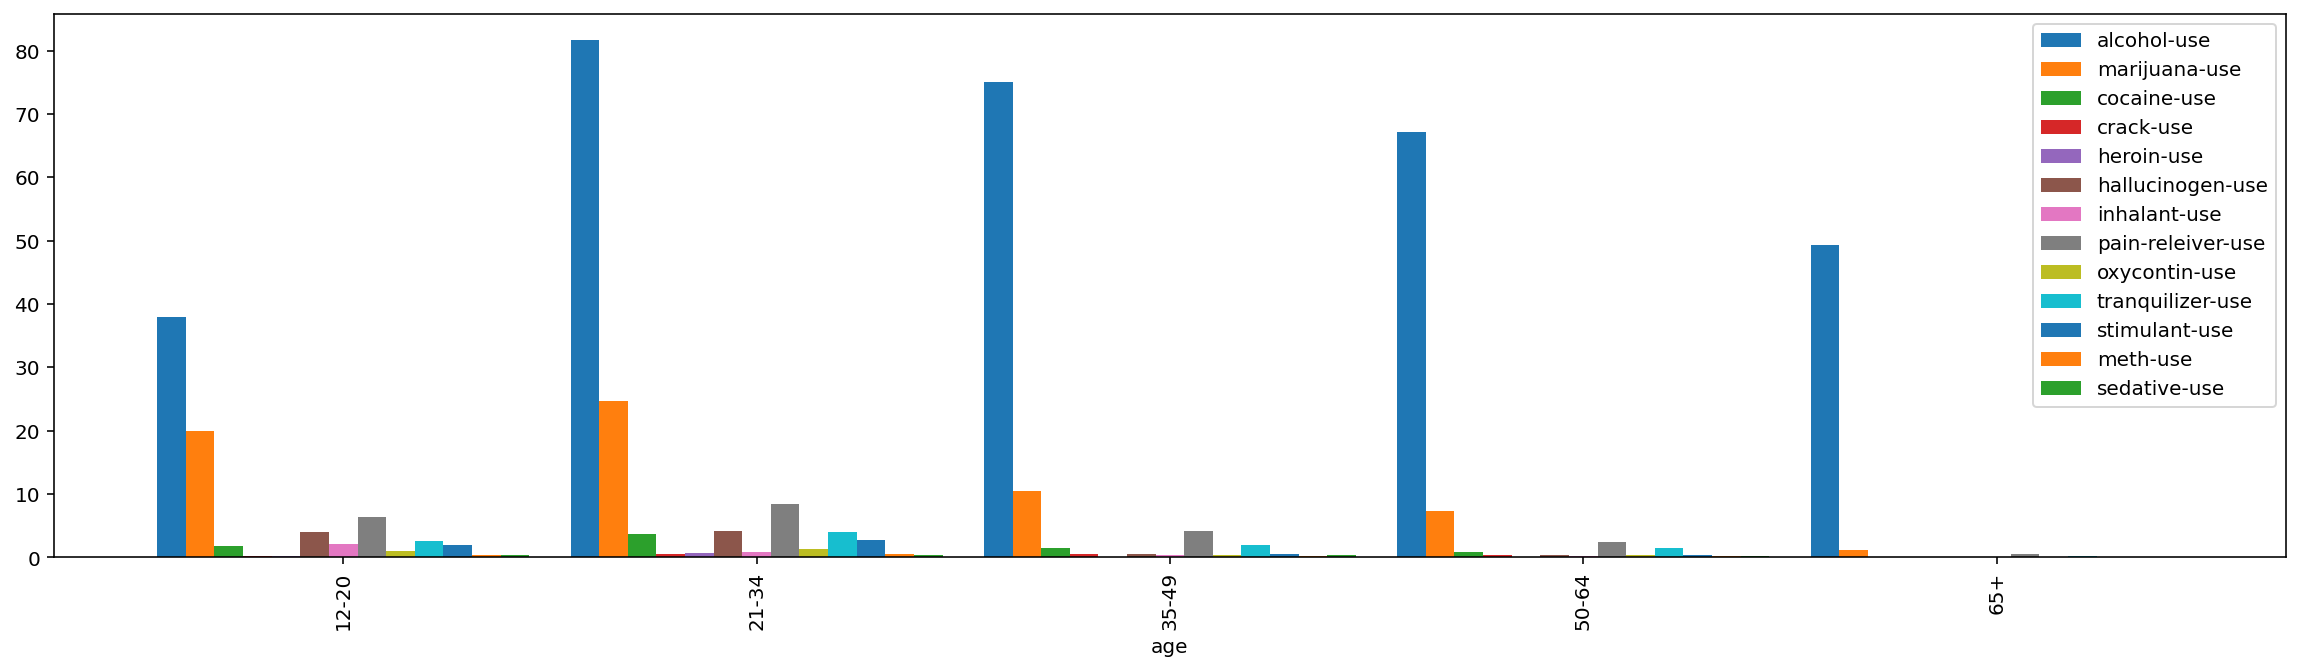

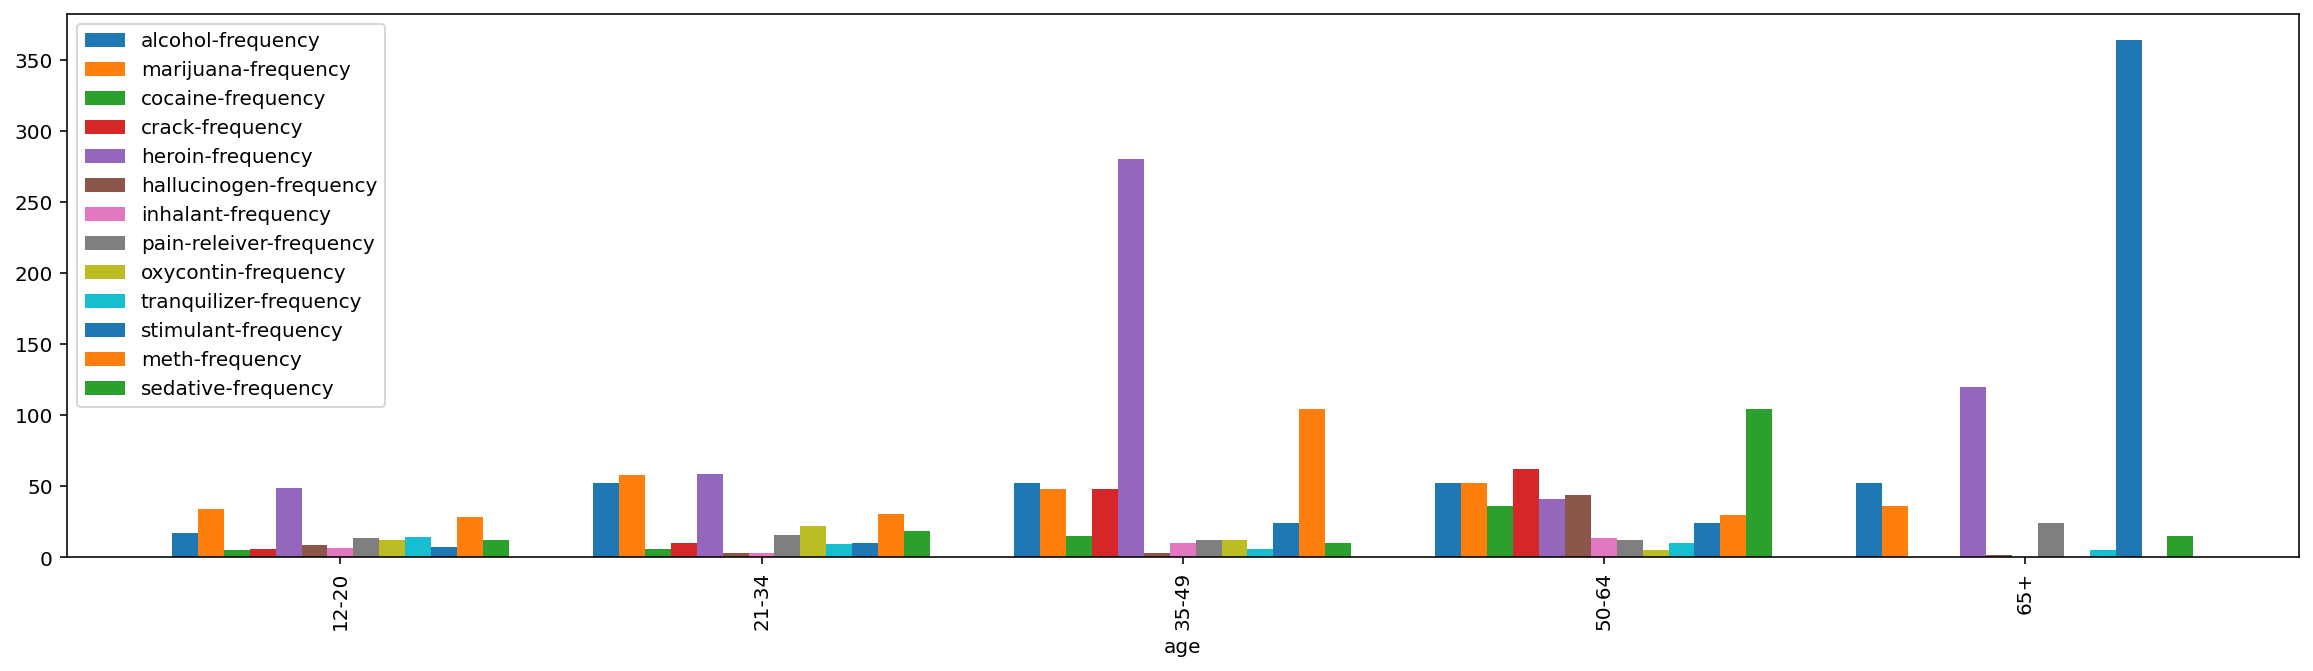

In [24]:
use_by_age_group = drug_by_age_group[['age','n','alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use','pain-releiver-use','oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']]
frequency_by_age_group = drug_by_age_group[['age','n','alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency']]

use_by_age_group.drop(columns = 'n').plot(kind = 'bar', x ='age', figsize = (20,5), width = .9)
frequency_by_age_group.drop(columns = 'n').plot(kind = 'bar', x ='age', figsize = (20,5), width = .8);

In [25]:
under_age = drug.drop(columns = 'age_ave').iloc[:9,:]
under_age_use = under_age[['age','n','alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use','pain-releiver-use','oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']]
under_age_frequency = under_age[['age','n','alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency']]

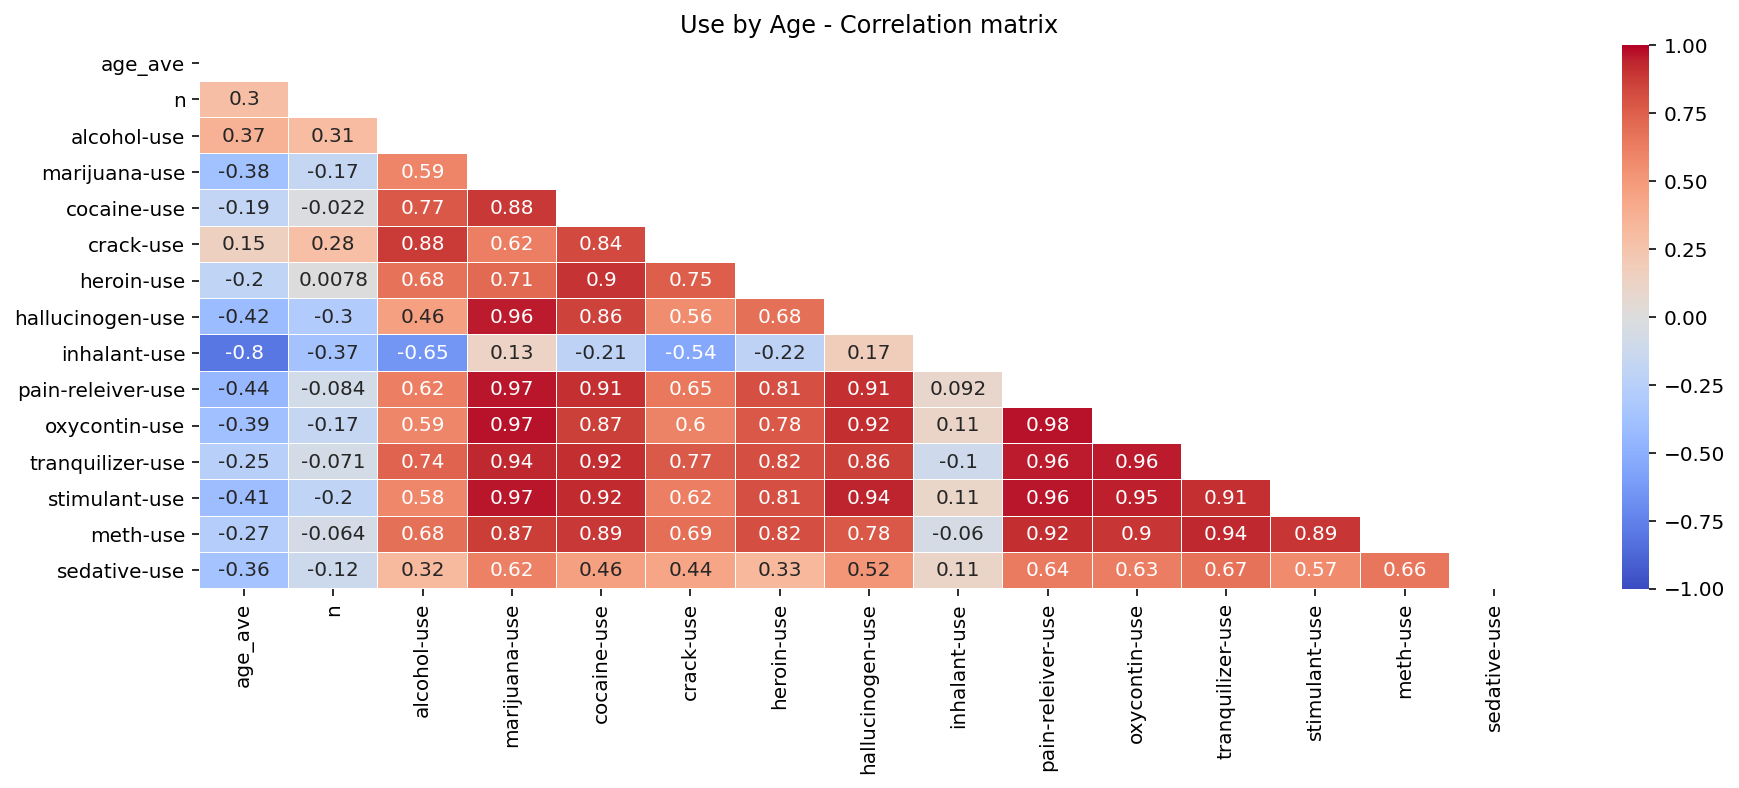

In [26]:
mask = np.zeros_like(use_by_age.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 5))
sns.heatmap(
    use_by_age.corr(),
    cmap='coolwarm', #palette being used
    annot=True, #annotate each square
    mask=mask, #get rid of redundant info, need only one half of matrix
    vmin=-1.,
    vmax=1.,
    linewidths=.01
)

plt.title('Use by Age - Correlation matrix');

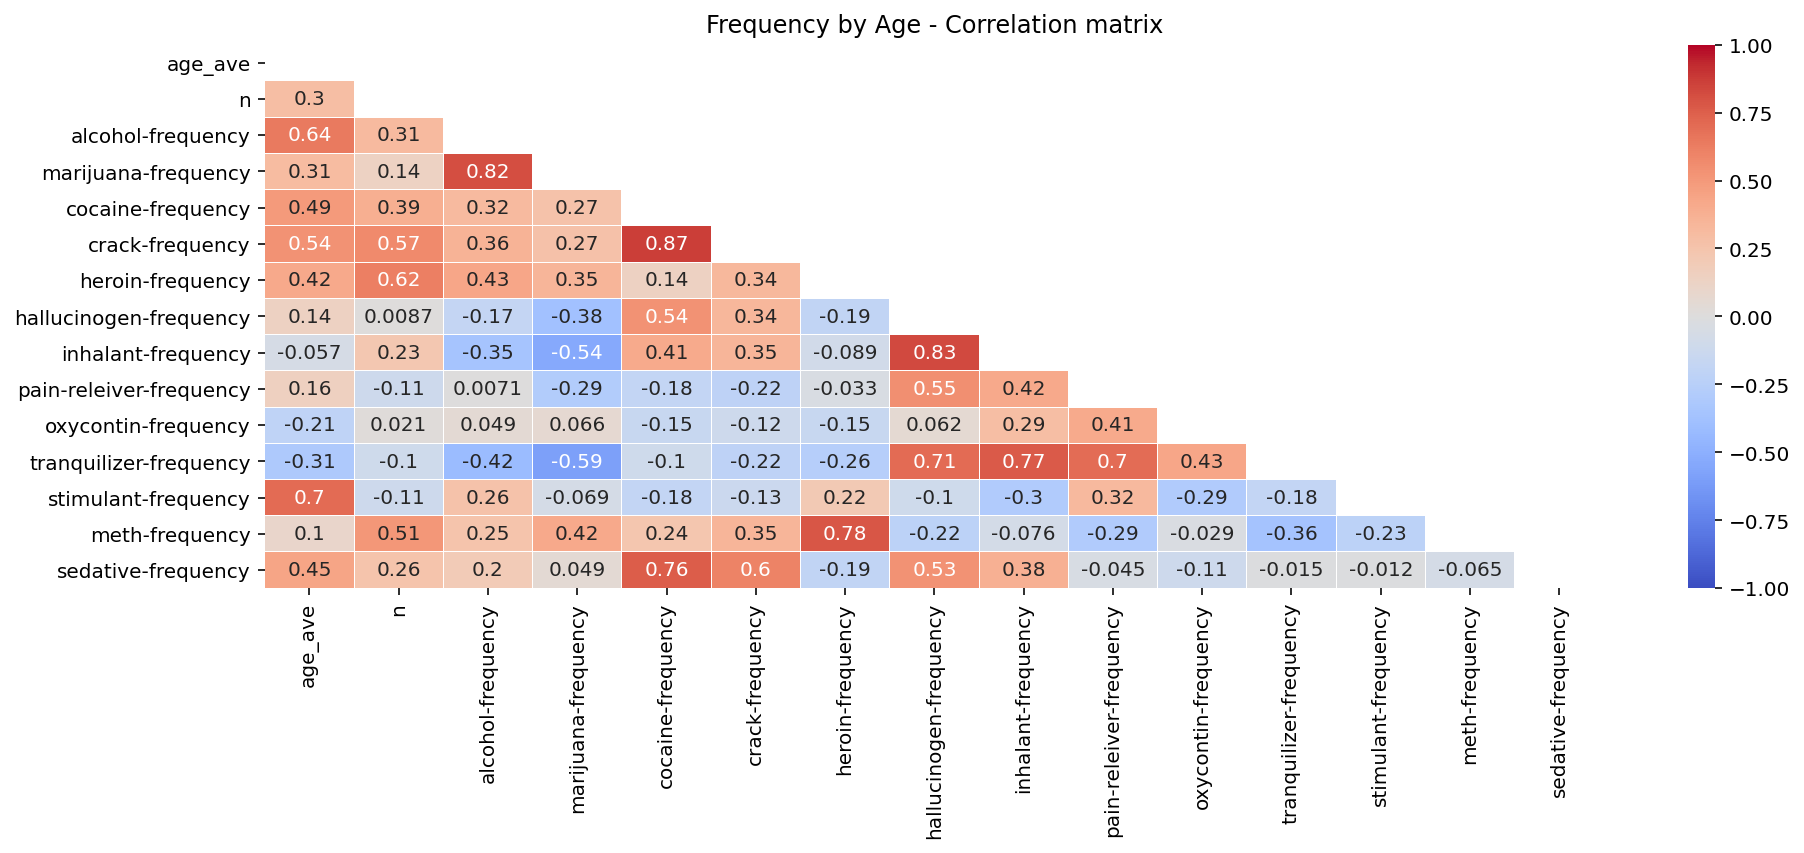

In [27]:
mask = np.zeros_like(frequency_by_age.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 5))
sns.heatmap(
    frequency_by_age.corr(),
    cmap='coolwarm', #palette being used
    annot=True, #annotate each square
    mask=mask, #get rid of redundant info, need only one half of matrix
    vmin=-1.,
    vmax=1.,
    linewidths=.01
)

plt.title('Frequency by Age - Correlation matrix');

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [28]:
# Below hypythosis test is based on the observation from correlation matric of drug use. 
# Correlation of -.83 was seem between inhalant use and age. 
# Therefore, I would like to test if this applies to the whole population. 

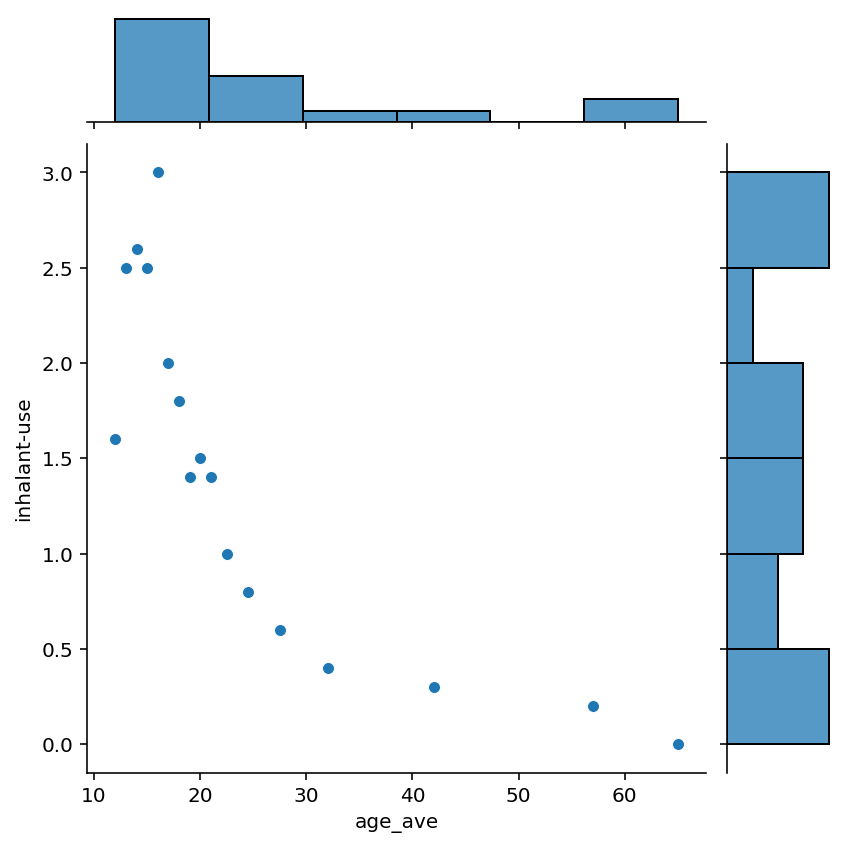

In [29]:
# HO: there is no difference in terms of usage of inhalant between underage and adults.(=)
# H1: the usage of inhalant is different between under age group (younger than 21)and adults.(> or <)
    
# # so it is 2-tailed test

sns.jointplot(data = drug[['age_ave','inhalant-use']], x = 'age_ave', y = 'inhalant-use');

In [30]:
under_age = drug[drug['age_ave']<21]['inhalant-use']
adults = drug[drug['age_ave'] >= 21]['inhalant-use']

stats.ttest_ind(under_age, adults).pvalue

2.5378969231057748e-05

In [31]:
# choose alpha = 0.05
# pvalue is smaller than alpha, so we reject null hypothesis with 99% certainty.
# conclusion will be that the usage of inhalant is different between under age group (younger than 21)and adults.(> or <)

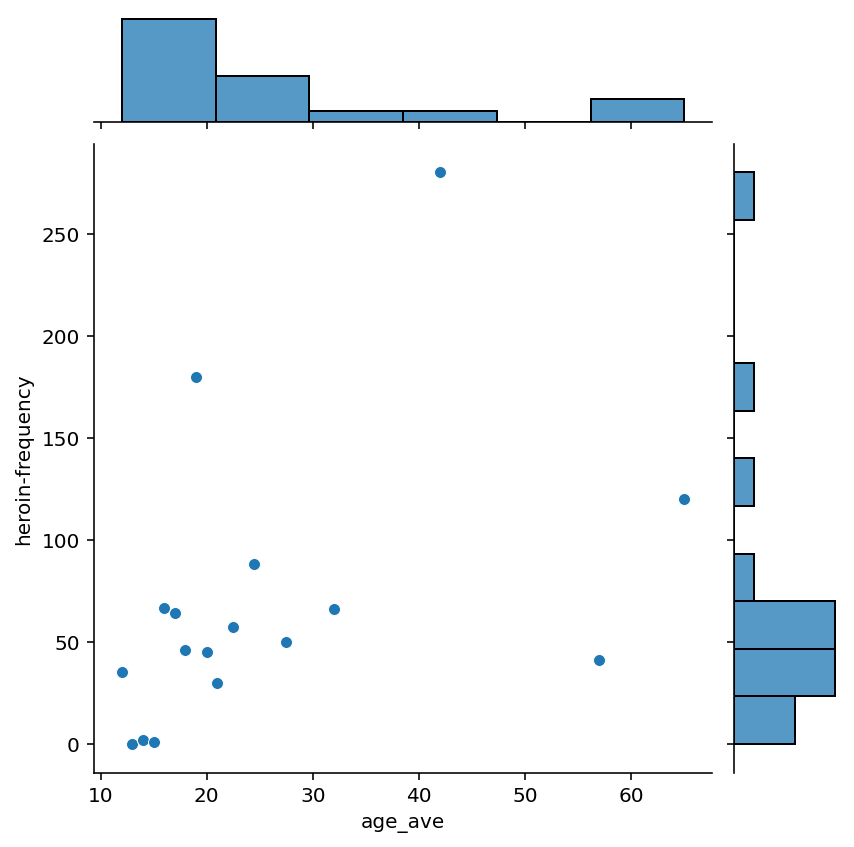

In [32]:
sns.jointplot(data = drug[['age_ave','heroin-frequency']], x = 'age_ave', y = 'heroin-frequency');

# HO: there is no difference in terms of frequency of heroin use between underage and adults.(=)
# H1: the use frequency of heroin is different between under age group (younger than 21)and adults.(> or <)

In [33]:
under_age = drug[drug['age_ave']<21]['heroin-frequency']
adults = drug[drug['age_ave'] >= 21]['heroin-frequency']
stats.ttest_ind(under_age, adults).pvalue

0.22128792185446694

In [34]:
# choose alpha = 0.05
# pvalue is greater than alpha, so we accept null hypothesis.
# conclusion is that the usage of heroin is no different between underage group (younger than 21) and adults.

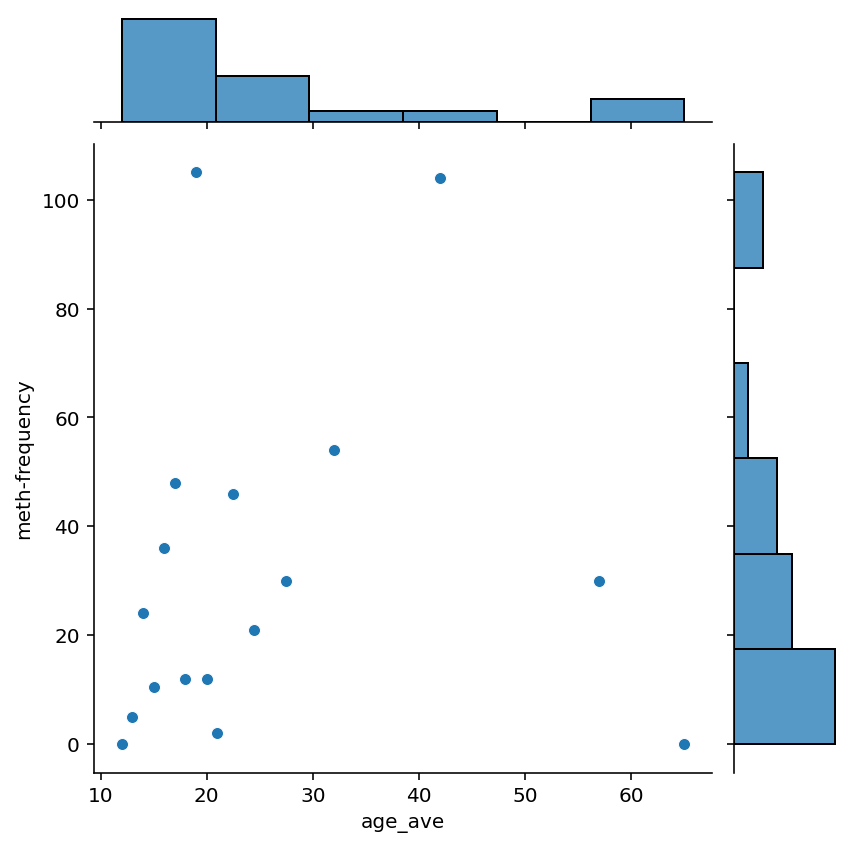

In [35]:
sns.jointplot(data = drug[['age_ave','meth-frequency']], x = 'age_ave', y = 'meth-frequency');

# HO: there is no difference in terms of frequency of meth use between underage and adults.(=)
# H1: the use frequency of meth is different between under age group (younger than 21)and adults.(> or <)

In [36]:
under_age = drug[drug['age_ave']<21]['meth-frequency']
adults = drug[drug['age_ave'] >= 21]['meth-frequency']
stats.ttest_ind(under_age, adults).pvalue

0.6328733357633554